In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Creating the dataset
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Moscow": [-6.5, -5.3, 0.5, 7.8, 14.5, 18.1, 20.5, 18.8, 13.2, 6.7, 0.5, -4.8],
    "Cairo": [14.2, 16.1, 18.7, 22.7, 26.4, 28.8, 29.1, 28.7, 26.5, 22.8, 18.6, 15.2],
    "Sydney": [23.5, 23.2, 21.8, 18.5, 15.8, 13.2, 12.5, 14.2, 16.8, 18.8, 20.9, 22.5],
}


# Converting to DataFrame
df = pd.DataFrame(data)
df = df.set_index("Month")
print("Temperature data for 3 cities:")
df

Temperature data for 3 cities:


,Moscow,Cairo,Sydney
Month,,,
Jan,-6.5,14.2,23.5
Feb,-5.3,16.1,23.2
Mar,0.5,18.7,21.8
Apr,7.8,22.7,18.5
May,14.5,26.4,15.8
Jun,18.1,28.8,13.2
Jul,20.5,29.1,12.5
Aug,18.8,28.7,14.2
Sep,13.2,26.5,16.8


In [15]:
# Task 1: mean, sd value

# Convert the DataFrame to a NumPy array
data_array = df.to_numpy()

# Calculate the mean and standard deviation of the data
overall_mean = np.mean(data_array)
overall_sd = np.std(data_array)
print(f"\nMean: {overall_mean:.2f}")
print(f"Standard deviation: {overall_sd:.2f}")

# Calculate the mean and standard deviation for each city
mean = np.mean(data_array, axis=0)  # axis=0 calculates the mean for each column
sd = np.std(data_array, axis=0) # axis=0 calculates the standard deviation for each column
print("\nMean and standard deviation for each city:")
for i, city in enumerate(df.columns):
    print(f"{city}: mean={mean[i]:.2f}°C, sd={sd[i]:.2f}°C")


Mean: 15.93
Standard deviation: 9.34

Mean and standard deviation for each city:
Moscow: mean=7.00°C, sd=9.56°C
Cairo: mean=22.32°C, sd=5.37°C
Sydney: mean=18.48°C, sd=3.79°C


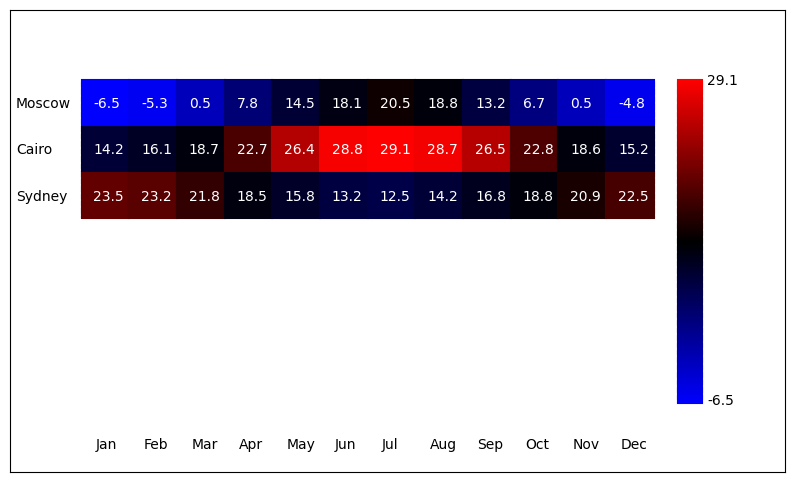

In [16]:
# Task 2: Draw a heatmap

# Define a function to draw a box with a specific color
def DrawBox(x, y, size, r, g, b):
    for i in range(int(size)):
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

# Convert the city temperature lists into a NumPy array:
# Rows represent cities and columns represent months.
Cities = np.array([data['Moscow'], data['Cairo'], data['Sydney']])
Min = np.min(Cities)
Max = np.max(Cities)

# Allow the user to specify a threshold value.
try:
    user_input = input("Enter threshold temperature (e.g., 15): ")
    Threshold = float(user_input)
except ValueError:
    print("Invalid input, defaulting to 15")
    Threshold = 15

# Configure the plot
plt.figure(figsize=(10, 6))
plt.axis([0, 650, 0, 400])
plt.xticks([])
plt.yticks([])
BoxSize = 40
OffsetX, OffsetY = 10, 15

# Draw the heatmap
for i in range(Cities.shape[0]):      # Loop over cities (rows)
    for j in range(Cities.shape[1]):  # Loop over months (columns)
        value = Cities[i, j]
        if value <= Threshold:
            ColourCode = int(((Threshold - value) / (Threshold - Min)) * 255)
            DrawBox(60 + BoxSize * j, 300 - BoxSize * i, BoxSize, 0, 0, ColourCode)
        else:
            ColourCode = int(((value - Threshold) / (Max - Threshold)) * 255)
            DrawBox(60 + BoxSize * j, 300 - BoxSize * i, BoxSize, ColourCode, 0, 0)
        plt.text(OffsetX + 60 + BoxSize * j, OffsetY + 300 - BoxSize * i, str(value), color='#FFFFFF')

# Draw the color scale (blue → red)
for i in range(280):
    if i < 140:
        ColourCode = int(((140 - i) / 140) * 255)
        plt.plot([560, 580], [i + 60, i + 60], '#{:02x}{:02x}{:02x}'.format(0, 0, ColourCode))
    else:
        ColourCode = int(((i - 140) / 140) * 255)
        plt.plot([560, 580], [i + 60, i + 60], '#{:02x}{:02x}{:02x}'.format(ColourCode, 0, 0))

plt.text(585, 58, str(Min))
plt.text(585, 335, str(Max))

# Month labels
months = data['Month']
for idx, month in enumerate(months):
    plt.text(72 + idx * 40, 20, month)

# City labels
cities = ['Moscow', 'Cairo', 'Sydney']
for idx, city in enumerate(cities):
    plt.text(5, 300 - BoxSize * idx + 15, city)

# Show the plot
plt.show()


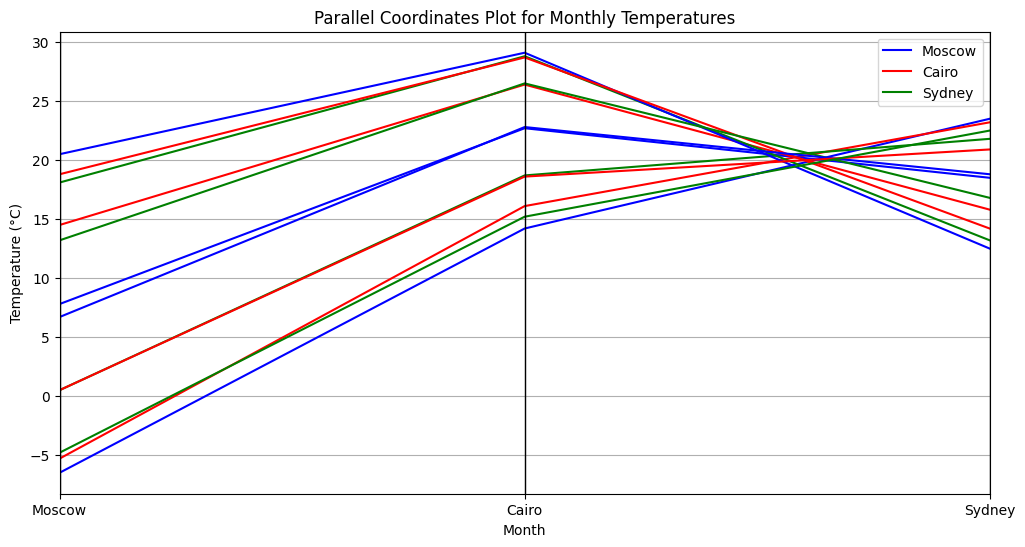

In [17]:
# Task 3: Draw a parallel coordinates plot

# Assign colors to each city for differentiation
city_colors = {
    "Moscow": "blue",
    "Cairo": "red",
    "Sydney": "green"
}

# Create a parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df.reset_index(), class_column="Month", color=list(city_colors.values()))

# Add labels and title
plt.title("Parallel Coordinates Plot for Monthly Temperatures")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=0)  # Rotate month labels for better readability
plt.legend(city_colors.keys(), loc="upper right")  # Add legend

# Show the plot
plt.show()